In [42]:
import warnings
import numpy as np
from collections import defaultdict
import random

warnings.filterwarnings('ignore')

### 拓扑排序

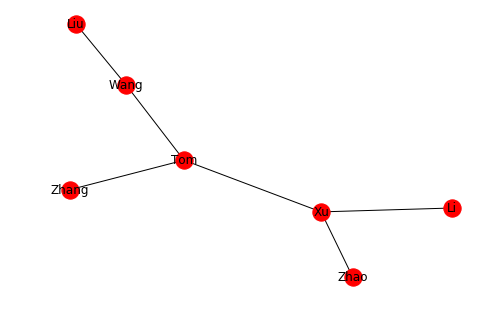

In [10]:
import matplotlib.pyplot as plt

import networkx as nx
people_relatioship = {
    'Wang': ['Liu', 'Tom'],
    'Tom': ['Zhang', 'Xu'],
    'Xu': ['Zhao', 'Li']
}
nx.draw(nx.Graph(people_relatioship), with_labels=True, )

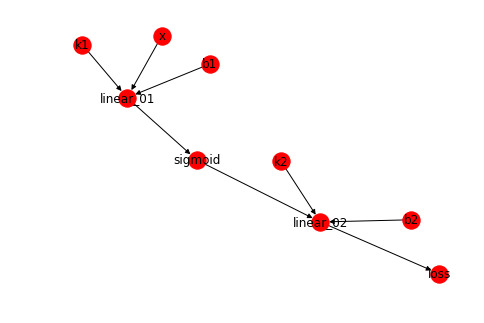

In [82]:
node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss = 'loss'

computing_graph = {
    node_x: [node_linear_01], 
    node_k1: [node_linear_01], 
    node_b1: [node_linear_01], 
    node_linear_01: [node_sigmoid], 
    node_sigmoid: [node_linear_02], 
    node_k2: [node_linear_02], 
    node_b2: [node_linear_02], 
    node_linear_02: [node_loss]
}

graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)
nx.draw(graph, layout, with_labels=True)

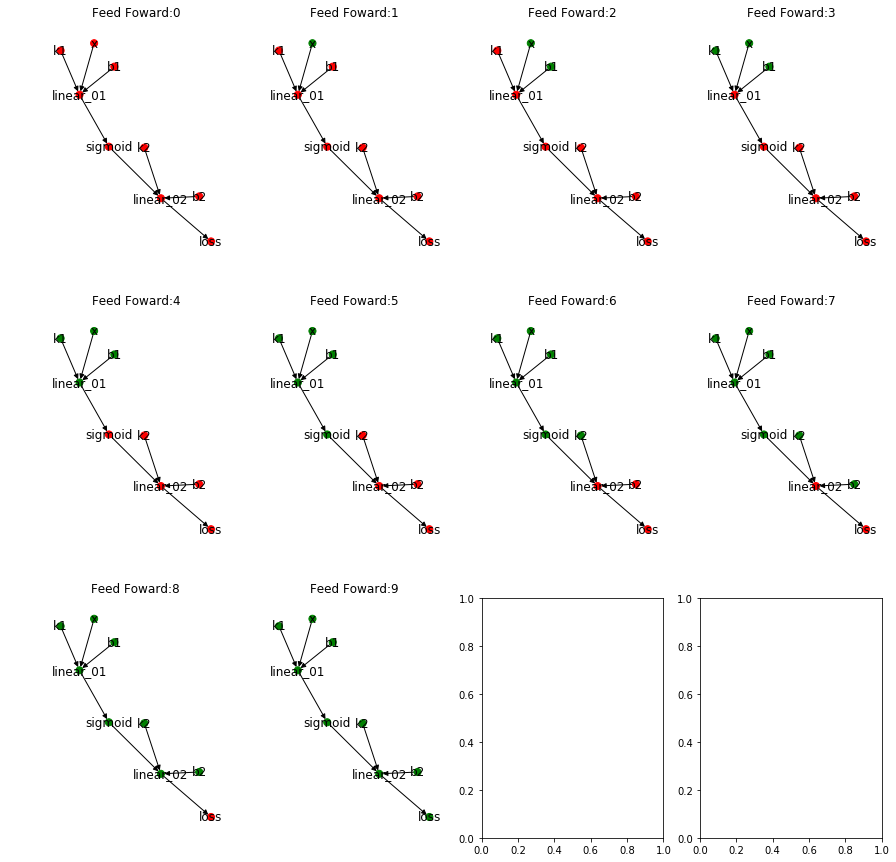

In [83]:
# 正向传播

visited_order = [node_x, node_b1, node_k1, node_linear_01, node_sigmoid, node_k2, node_b2, node_linear_02, node_loss]

def visited_procedure(graph, position, visited_order, step=None, 
                      sub_plot_index=None, colors=('red', 'green'), node_size=5):
    changed = visited_order[: step] if step is not None else visited_order
    before, after = colors
    color_map = [after if c in changed else before for c in graph]
    nx.draw(graph, position, node_color=color_map, with_labels=True, ax=sub_plot_index, node_size=node_size)
    

dimension = int(len(visited_order) ** 0.5)
fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))
    
for step in range(len(visited_order) + 1):
    ix = np.unravel_index(step, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text(f'Feed Foward:{step}')
    visited_procedure(graph, layout, visited_order, step, sub_plot_index=ax[ix], node_size=50)
    

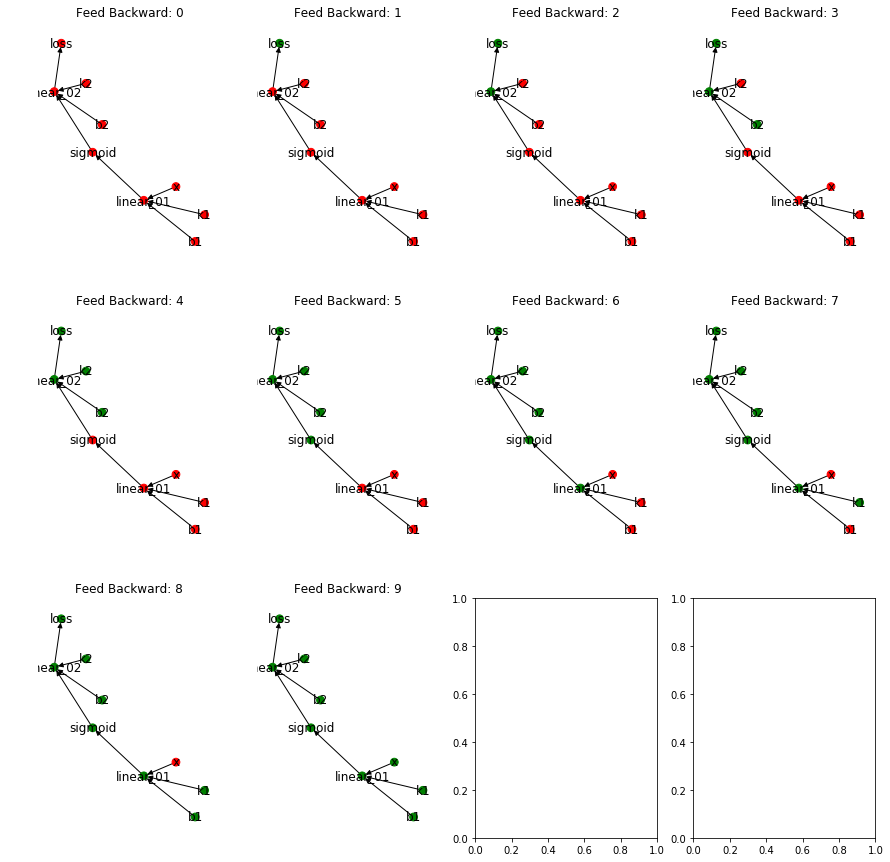

In [27]:
# 反向传播

fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))

for step in range(len(visited_order) + 1):
    ix = np.unravel_index(step, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text(f'Feed Backward: {step}')
    visited_procedure(graph, layout, visited_order[::-1], step, sub_plot_index=ax[ix], node_size=60)

In [84]:
# 拓扑排序
def topological_sort(graph):
    tmp_graph = graph.copy()
    sorted_node = []
    while len(tmp_graph) > 0:
        all_inputs = []
        all_outputs = []
        
        for n in tmp_graph:
            all_inputs += tmp_graph[n]
            all_outputs.append(n)
            
        all_inputs = set(all_inputs)
        all_outputs = set(all_outputs)
        
        need_remove = all_outputs - all_inputs

        if (len(need_remove) > 0):
            node = random.choice(list(need_remove))
            visited_next = [node]
            
            if len(tmp_graph) == 1: visited_next += tmp_graph[node]
            tmp_graph.pop(node)
            
            sorted_node += visited_next
            
            for links in tmp_graph.values():
                if node in links: links.remove(node)
        else:
            break
    return sorted_node

topological_sort(computing_graph)

['b2', 'k1', 'b1', 'k2', 'x', 'linear_01', 'sigmoid', 'linear_02', 'loss']

In [78]:
node_linear_01 = 'linear_01'
node_linear_02 = 'linear_02'
node_linear_03 = 'linear_03'
node_linear_04 = 'linear_04'
node_linear_05 = 'linear_05'
node_linear_06 = 'linear_06'

node_k1, node_b1 = 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_k3, node_b3 = 'k3', 'b3'
node_k4, node_b4 = 'k4', 'b4'
node_k5, node_b5 = 'k5', 'b5'
node_k6, node_b6 = 'k6', 'b6'

node_sigmoid_01 = 'sigmoid-01'
node_sigmoid_02 = 'sigmoid-02'
node_sigmoid_03 = 'sigmoid-03'
node_sigmoid_04 = 'sigmoid-04'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    
    node_x: [node_linear_02],
    node_k2:[node_linear_02],
    node_b2:[node_linear_03],
    
    node_linear_01: [node_sigmoid_01, node_sigmoid_02],
    node_linear_02: [node_sigmoid_03, node_sigmoid_04],

    node_sigmoid_01: [node_linear_04],
    node_sigmoid_02: [node_linear_03],
    node_sigmoid_03: [node_linear_05],
    node_sigmoid_04: [node_linear_06],
    
    node_linear_03: [node_loss],
    node_linear_04: [node_loss],
    node_linear_05: [node_loss],
    node_linear_06: [node_loss],
    
}

more_complicated_graph = nx.DiGraph(computing_graph)
more_complicated_layout = nx.layout.spring_layout(more_complicated_graph)

['b2', 'b1', 'x', 'k1', 'k2', 'linear_01', 'sigmoid', 'linear_02', 'loss']


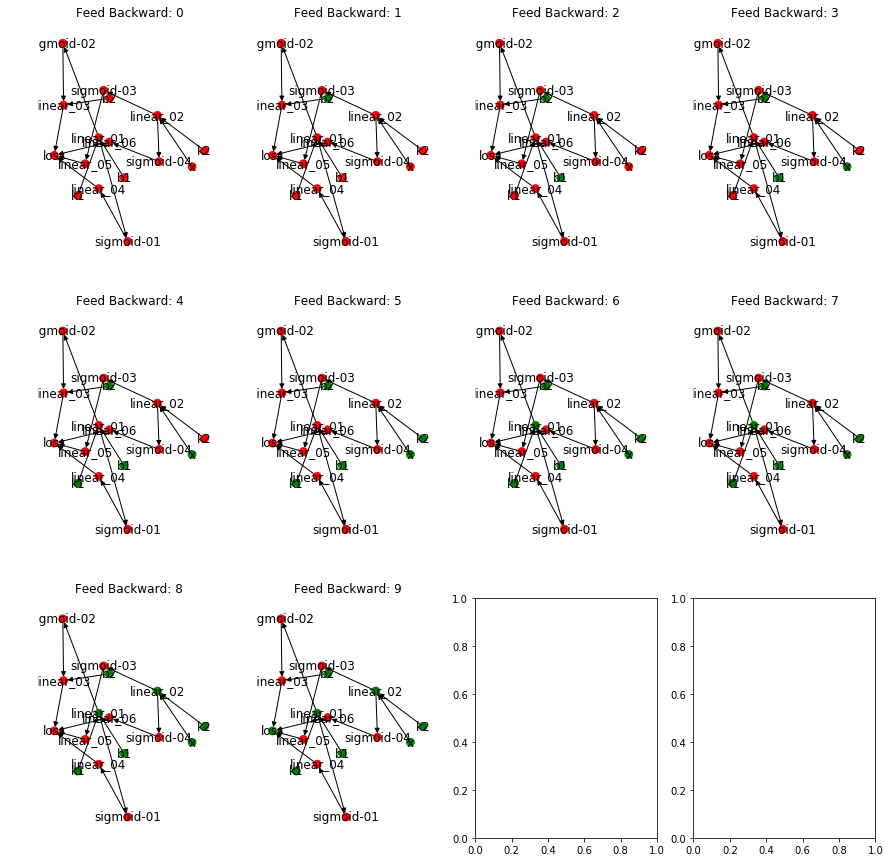

In [85]:
def draw_topological_sort(computing_graph, graph, layout):
    visited_order = topological_sort(computing_graph)
    print(visited_order)
    
    dimension = int(len(visited_order) ** 0.5)
    fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))

    for step in range(len(visited_order) + 1):
        ix = np.unravel_index(step, ax.shape)
        plt.sca(ax[ix])
        ax[ix].title.set_text(f'Feed Backward: {step}')
        visited_procedure(graph, layout, visited_order, step, sub_plot_index=ax[ix], node_size=60)

draw_topological_sort(computing_graph, more_complicated_graph, more_complicated_layout)

In [29]:
class Node:
    def __init__(self, inputs=[], name=None, is_trainable=True):
        self.inputs = inputs
        self.ouputs = []
        self.name = name
        self.value = None
        self.gradients = {}
        # key are the inputs to this node, 
        # and their values are the partials of this node with respect to that input.
        # \partial{node}{input_i}
        
        for n in self.inputs:
            # set 'self' node as inbound_nodes's outbound_nodes
            n.ouputs.append(self)
    
    def forward(self): 
        '''
        Forward propagation.
        Compute the output value based on 'inbound_nodes' and store the result in self.value
        '''
        raise NotImplemented
    
    def backward(self):
        raise NotImplemented
    
    def __repr__(self):
        return self.name

In [30]:
class Placeholder(Node):
    def __init__(self, name, is_trainable=True):
        Node.__init__(self, name, is_trainable=is_trainable)
        
    def forward(self, value=None):
        if value: self.value = value
    
    def backward(self):
        for n in self.inputs:
            self.gradients[self] = n.gradients[self] * 1


class Linear(Node):
    def __init__(self, X=None, weight=None, bias=None, name=None, is_trainable=False):
        Node.__init__(inputs=[X, weight, bias], name=name, is_trainable=is_trainable)
    
    def forward():
        k, x, b = self.inputs[1], self.inputs[0], self.inputs[2]
        self.value = k.value * x.value + b.value
    
    def backward():
        k, x, b = self.inputs[1], self.inputs[0], self.inputs[2]
        for n in self.outputs:
            grad_cost = n.gradients[n]
            self.gradients[k] = grad_cost * x.value
            self.gradients[x] = grad_cost * k.value
            self.gradients[b] = grad_cost * 1


class Sigmoid(Node):
    def __init__(self, X, name=None, is_trainable=False):
        Node.__init__(self, [X], name=name, is_trainable=is_trainable)
        self.x = self.inputs[0]
    
    def _sigmoid(self, x):
        return 1. / (1 + np.exp(-1 * x))
    
    def forward(self):
        self.value = self._sigmoid(self.x.value)
    
    def partial(self):
        return self._sigmoid(self.x.value) * (1 - self._sigmoid(self.x.value))
    
    def backward(self):
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self.x] = grad_cost * self.partial()


class Relu(Node):
    def __init__(self, X, name=None, is_trainable=False):
        Node.__init__(self, [X], name=name, is_trainable=is_trainable)
    
    def forward(self):
        self.value = self.x.value * (self.x.value > 0)
        
    def backward(self):
        for n in self.outputs:
            grad_cost = self.gradients[self]
            self.gradients[self.x] = grad_cost * (self.x.value > 0)
            
            
class L2_LOSS(Node):
    def __init__(self, y, y_hat, name=None, is_trainable=is_trainable):
        Node.__init__(self, [y, y_hat], name=name, is_trainable=is_trainable)
        self.y = y
        self.y_hat = y_hat
    
    def forward(self):
        y_value = np.array(self.y.value)
        y_hat_value = np.array(self.y_hat.value)
        self.value = np.mean((y_value - y_hat_value) ** 2)
    
    def backward(self):
        y_value = np.array(self.y.value)
        y_hat_value = np.array(self.y_hat.value)
        self.gradients[self.y] = 2 * np.mean((y_value - y_hat_value))
        self.gradients[self.y_hat] = 2 * np.mean((y_value - y_hat_value))
        


In [ ]:
def convert_feed_dict_to_graph(feed_dict):
    
    computing_grap = defaultdict(list)
    nodes = [n for n in feed_dict]
    while nodes:
        n = nodes.pop(0)
        if isinstance(n, Placeholder):
            n.value = feed_dict[n]
        if n in computing_grap: continue
        for m in n.outputs:
            computing_grap[n].append(m)
            nodes.append(m)
        
    return computing_grap

def topological_sort_feed_dict(feed_dict):
    graph = convert_feed_dict_to_graph(feed_dict)
    return topological_sort(graph)


def forward_and_backward(graph_order, monitor=False):
    for node in graph_order:
        if monitor:
            print(f'forward computing -- {node}')
        node.forward()
    
    for node in graph_order[::-1]:
        if monitor:
            print(f'backward computing -- {node}')
        node.backward()
        

def optimize(graph, learning_rate=1e-2):
    for t in graph:
        if t.is_trainable:
            t.value += -1 * learning_rate * t.gradients[t]

            